# Анализ A/B-теста интернет-магазина 

# - Описание проекта:
Данный проект представляет собой анализ A/B-теста, проведенного в интернет-магазине с целью увеличения выручки. В рамках проекта будет выполнена приоритизация гипотез по увеличению выручки с использованием фреймворков ICE и RICE. Затем будет проведен анализ результатов A/B-теста с использованием данных о заказах и посетителях.


# - Цель исследования:
Целью данного проекта является выявление эффективности гипотез по увеличению выручки интернет-магазина и анализ результатов A/B-теста для принятия обоснованных решений.


# - Задачи исследования:
- Приоритизация гипотез с помощью фреймворков ICE и RICE.
- Построение графиков кумулятивной выручки, среднего чека, относительного изменения среднего чека, кумулятивного среднего количества заказов на посетителя и относительного изменения этого показателя.
- Анализ данных о заказах и посетителях, включая точечные графики количества заказов на пользователя и стоимости заказов.
- Определение аномальных пользователей и заказов на основе перцентилей.
- Проведение статистического анализа различий в среднем количестве заказов на посетителя и среднем чеке между группами по "сырым" и "очищенным" данным.
- Принятие решения по результатам A/B-теста.


# - План действий:
1. Посмотрим на данные, если потребуется предобработаем.
1. Провести приоритизацию гипотез с использованием фреймворков ICE и RICE.
2. Построить необходимые графики кумулятивной выручки, среднего чека, относительного изменения среднего чека, кумулятивного среднего количества заказов на посетителя и относительного изменения этого показателя.
3. Проанализировать данные о заказах и посетителях, выявить аномалии.
4. Провести статистический анализ различий между группами по ключевым показателям.
5. Принять решение по результатам A/B-теста и подготовить выводы и рекомендации на основе проведенного анализа.


# Предобработка и подготовка данных к анализу

In [1]:
#Загрузим библеотеки

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import factorial
from scipy.stats import poisson
from scipy.stats import binom
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
data.info()
pd.options.display.max_colwidth = 130
data.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Тип данных верный, пропусков в данных нет. Нужно привести названия столбцов к нижнему регистру для удобного использования.

In [4]:
#Приведем названия к нижнему регистру
data.columns = data.columns.str.lower()
data.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [5]:
#Посмотрим на дубликаты
#data.isna().sum()
data.duplicated().sum()

0

Дубликатов не обнаружили

# Часть 1. Приоритизация гипотез.

In [6]:
#Применим ICE для приоритизации гипотез

data['ICE'] = data['impact'] * data['confidence'] / data['efforts']
data['ICE'] = data['ICE'].round(2)
display (data)

,hypothesis,reach,impact,confidence,efforts,ICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20


In [7]:
#Применим RICE для приоритизации гипотез

data['RICE'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']
display (data)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2


- При использовании фреймворка RICE приоритет гипотез изменяется по сравнению с ICE из-за учета параметра Reach (охват). Гипотезы, которые имеют большой охват:
  -  гипотеза 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок)   
  -  гипотеза 2 (Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа));
  
  - гипотеза 3 (Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар).


- Гипотезы с высоким охватом и высоким влиянием на пользователей могут получить более высокий приоритет по RICE, даже если у них невысокая уверенность или высокие усилия.
- RICE учитывает не только потенциальную значимость гипотезы, но и ее реализуемость и охват аудитории, что может привести к изменению порядка приоритетности гипотез по сравнению с ICE.


# Часть 2. Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv. Посмотрим на данные, которые хранятся в этим таблицах.



# Предобработка данных после проведенного A/B теста.

In [8]:
orders1 = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [9]:
#Посмотрим датафрейм orders

orders1.info()
orders1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Пропусков данных нет. В столбце date нужно привести данные в формат datetime. Также привести в первых двух столбцах названия к нижнему регистру.


In [10]:
#Поменяем тип данных и приведем названия к нижнему регистру

orders1['date'] = pd.to_datetime(orders1['date'])
orders1.columns = orders1.columns.str.lower()

#Проверим данные

orders1.info()
orders1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
#Посмотрим датафрейм visitors

visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Пропусков не выявлено. Нужно поменять формат данных в столбце date.

In [12]:
#Поменяем тип данных.

visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [13]:
#Посмотрим на дубликаты в обоих таблицах

display (orders1.duplicated().sum())
display (visitors.duplicated().sum())

0

0

In [14]:
orders1[orders1.duplicated(subset=['visitorid'], keep=False)].sort_values(by='visitorid')

,transactionid,visitorid,date,revenue,group
71,3679129301,8300375,2019-08-01,10510,B
703,4293855558,8300375,2019-08-07,1790,A
1102,1941707234,199603092,2019-08-12,6438,A
823,2971973105,199603092,2019-08-27,2790,A
134,62794304,199603092,2019-08-22,6976,A
...,...,...,...,...,...
1019,453824282,4256040402,2019-08-31,1850,B
253,1610091760,4256040402,2019-08-23,16950,A
263,2575861846,4256040402,2019-08-18,10970,B
682,1216533772,4266935830,2019-08-29,78990,B


Обнаружили 260 строк дубликатов. Посмотрим есть ли пользователи, которые попали в обе группы теста.


In [15]:
#Создаем функцию, чтобы проверить пользователей на уникальность

def uniq(data):
    usersA = data.query('group == "A"')['visitorid']
    usersB= data.query('group == "B"')['visitorid']
    same_users = usersB[usersB.isin(usersA)]
    display(same_users.nunique())
    return(same_users)

In [16]:
same_visitors = uniq(orders1)

58

- Нашли 58 пользователей - дубликатов. Избавимся от этих чисел чтобы не путать данные.

In [17]:
orders = orders1.query('visitorid not in @same_visitors')

#Проверим руезультат

uniq(orders)

0

Series([], Name: visitorid, dtype: int64)

- Избалились от дубликатов

## График кумулятивной выручки по группам.

In [18]:
#Создадим датафрейм datesGroups с уникальными парами значений date и group, таблицы orders и избавимся от дубликатов

dateGroups = orders[['date', 'group']].drop_duplicates()

#Объявим переменную ordersAggregated и visitorsAggregated

ordersAggregated = dateGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
        'date': 'max',
        'group': 'max',
        'transactionid': 'nunique',
        'visitorid': 'nunique',
        'revenue': 'sum'
    }), axis=1).sort_values(by=['date', 'group'])


visitorsAggregated = dateGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
        'date' : 'max',
        'group' : 'max', 
        'visitors' : 'sum'
    }), axis=1).sort_values(by=['date','group'])



#Обединим ordersAggregated и visitorsAggregated в переменную cumulativeData. Далее добавим столбец 'conversion'

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData['conversion'] = (cumulativeData['orders'] / cumulativeData['visitors'])
display (cumulativeData.head())

#Теперь создадим переменные cumulativeDataA и cumulativeDataB , в которых будут результаты по группам A и B

cumulativeDataA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders','visitors',]]
cumulativeDataB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders', 'visitors']]





,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
1,2019-08-01,B,17,17,59758,713,0.023843
2,2019-08-02,A,42,36,234381,1338,0.031390
3,2019-08-02,B,40,39,221801,1294,0.030912
4,2019-08-03,A,66,60,346854,1845,0.035772


In [19]:
cumulativeData['date'].min()
cumulativeData['date'].max()

Timestamp('2019-08-31 00:00:00')

-  Минимальная и максимальная даты совпадают с исходными данными

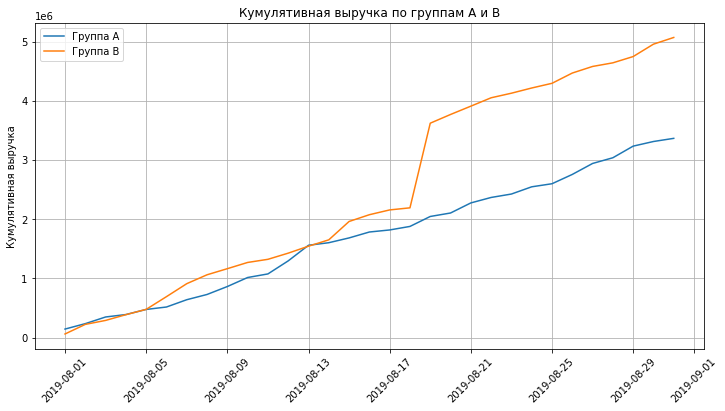

In [20]:
#Теперь построим график выручки по группам.

plt.figure(figsize=(12, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue'], label='Группа A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue'], label='Группа B')
plt.ylabel('Кумулятивная выручка')
plt.title('Кумулятивная выручка по группам A и B')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



- В первые 5 дней выручка в обоих группах растет одинаково. Далее, выручка группы B начинает более явно расти и до конца месяца лидирует. Был явный скачок в районе 18 августа, скорее всего это связано с дорогим или дорогими заказами в этот день. Группа B 13 августа сравнивается по показателю выручки с группой A, но далее растет очень умеренно в сравнении с группой B.
- Такую причину скачка можно описать несколькими возможными причинами. Например, мог вырасти средний чек заказов или их количество. Посмотрим на результаты дальше.

## График кумулятивного среднего чека по группам.

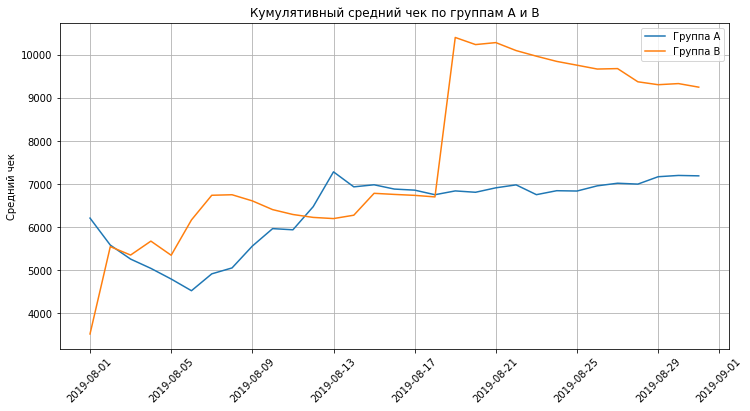

In [21]:
#Посчитаем средний кумулятивный чек по группам — разделим кумулятивную выручку на кумулятивное число заказов
#Посмотрим график

plt.figure(figsize=(12, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue']/cumulativeDataA['orders'], label='Группа A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue']/cumulativeDataB['orders'], label='Группа B')
plt.ylabel('Средний чек')
plt.title('Кумулятивный средний чек по группам A и B')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


- На графике среднего чека видим следующее: группа B преимущественно лидирует на этом графике, за исключением периода с 11 по 15 августа; далее видим всплеск среднего чека 18 августа в группе B и небольшое падение к концу месяца; средний чек группы A после всплеска 13 августа также умеренно пдаает к концу месяца.

## График относительного изменения кумулятивного среднего чека группы B к группе A.

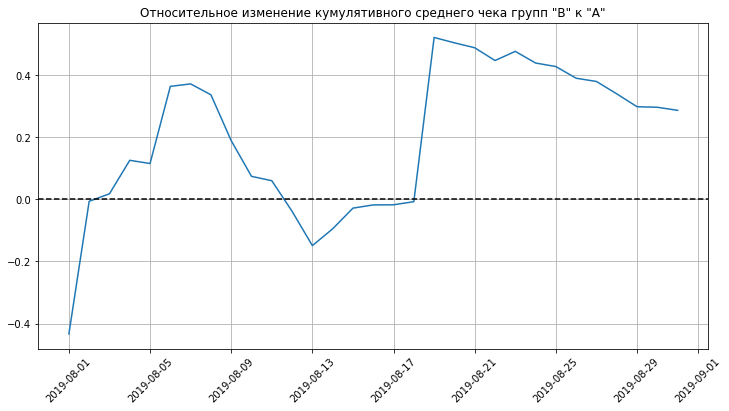

In [22]:
#Объединим таблицы cumulativeDataA и cumulativeDataB  в переменную mergedCumulativeData

mergedCumulativeData = cumulativeDataA.merge(
    cumulativeDataB,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B']
)

#Построим график относительного изменения кумулятивного среднего чека группы B к группе A

plt.figure(figsize=(12,6))
plt.plot(mergedCumulativeData['date'], (
    mergedCumulativeData['revenueB']/mergedCumulativeData['ordersB'])/
    (mergedCumulativeData['revenueA']/mergedCumulativeData['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека групп "B" к "А"')
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--') ;
plt.xticks(rotation=45)
plt.show()




- Средний чек группы B рос начиная с 1 августа, 2 августа уже перерос группу A. 8 августа показатель начал снижаться и 11 числа группа A вышла вперед до 15 числа. Далее, был рост группы B - 15 августа вышли вперед, 18 август был выше описанный скачок и вплоть до конца опережали группу A. 

## График кумулятивного среднего количества заказов на посетителя по группам.

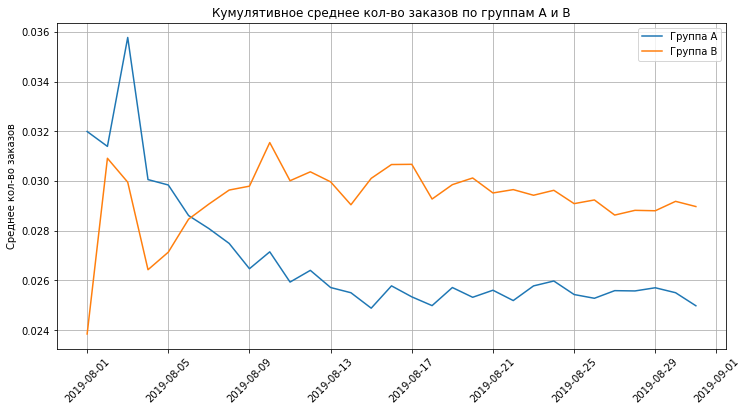

In [23]:
#Построим график кумулятивного среднего количества заказов на посетителя по группам

plt.figure(figsize=(12, 6))
plt.plot(mergedCumulativeData['date'], mergedCumulativeData['ordersA']/mergedCumulativeData['visitorsA'], label='Группа A')
plt.plot(mergedCumulativeData['date'], mergedCumulativeData['ordersB']/mergedCumulativeData['visitorsB'], label='Группа B')
plt.ylabel('Среднее кол-во заказов')
plt.title('Кумулятивное среднее кол-во заказов по группам A и B')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

- В группе А с первого дня был более высокий уровень заказов (0.033), 2 числа был резкий скачок и далее падение до 4 августа ; после 5 августа показатель пошел на спад и после 9 августа кол-во заказов не превышало 0.031;
- В группе B был скачок 2 августа, далее падение и 4 августа снова прирост заказов. Также, были резкие всплески с 7 по 10 августа и с 14 по 17 августа. Далее график идет на умеренный спад. После 7 августа показатель не падал ниже 0.033 заказов в день

## График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

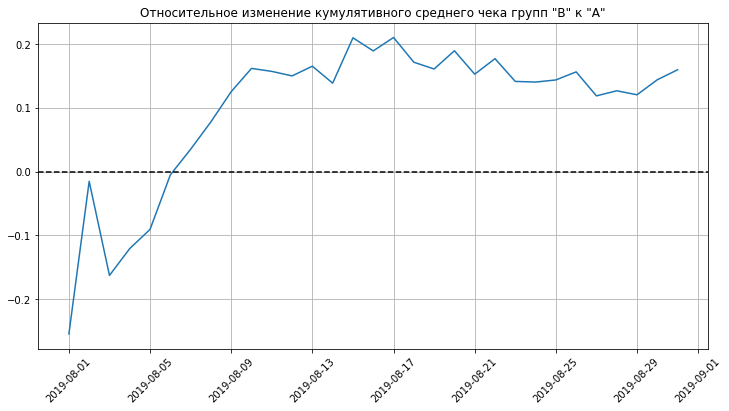

In [24]:
#Построим график относительного изменения 

plt.figure(figsize=(12,6))
plt.plot(mergedCumulativeData['date'], (
    mergedCumulativeData['ordersB']/mergedCumulativeData['visitorsB'])/
    (mergedCumulativeData['ordersA']/mergedCumulativeData['visitorsA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека групп "B" к "А"')
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--') ;
plt.xticks(rotation=45)
plt.show()


- 2 августа кумулятивный средний чек был выше у группы B; далее, до 5 числа лидировала группа A; с 5 августа до конца месяца постоянно лидировала группа B.

## Точечный график количества заказов по пользователям.

In [25]:
#Создадим переменную с количеством заказов по пользователям

ordersByUsers = orders.groupby(
    'visitorid', as_index=False).agg(
    {'transactionid':'nunique',
    'group':'max',
    'date':'max'}).rename(
    columns={'transactionid':'orders'})
ordersByUsers.columns = ['visitorid','orders','group', 'date']

ordersByUsers.sort_values(by = 'orders', ascending = False).head(10)

,visitorid,orders,group,date
908,3967698036,3,A,2019-08-02
55,249864742,3,B,2019-08-24
478,2108163459,3,A,2019-08-09
687,2988190573,3,A,2019-08-30
890,3908431265,3,A,2019-08-06
138,611059232,3,A,2019-08-01
632,2742574263,3,B,2019-08-22
157,678354126,2,A,2019-08-28
323,1404560065,2,B,2019-08-27
452,1985475298,2,B,2019-08-13


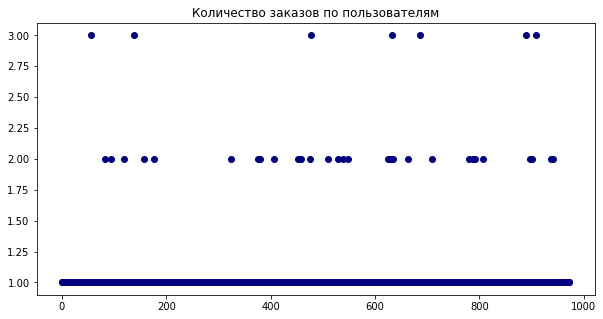

In [26]:
#Построим точечный график

x_values = pd.Series(range(0,len(ordersByUsers['orders'])))

plt.figure(figsize=(10,5))
plt.scatter(x_values, ordersByUsers['orders'], color='navy')
plt.title('Количество заказов по пользователям')
plt.show()

- Только 7 пользователей совершали 3 покупки, в основном у пользователей 1-2 покупки. 

## 95-й и 99-й перцентили количества заказов на пользователя.

In [27]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

- 95 перцентиль - 1 заказ
- 99 перцентиль - 2 заказа
- 1-2 заказа - нормальные границы заказов.

## Точечный график стоимостей заказов

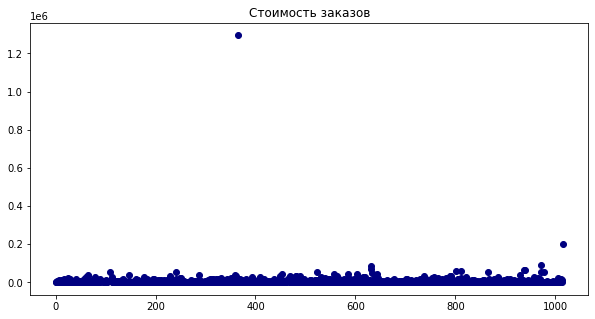

      transactionid   visitorid       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A
949      1347999392   887908475 2019-08-21    60450     A
940      2420050534  4003628586 2019-08-08    58550     B
131      3163614039  2254586615 2019-08-22    53904     A


In [28]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(10,5))
plt.scatter(x_values, orders['revenue'] , color='navy')
plt.title('Стоимость заказов')
plt.show()

print (orders.sort_values('revenue', ascending = False).head(10))

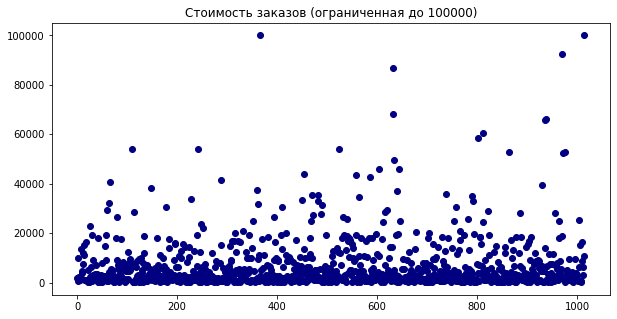

In [29]:
filtered_revenue = orders['revenue'].clip(upper=100000)

plt.figure(figsize=(10, 5))
plt.scatter(x_values, filtered_revenue, color='navy')
plt.title('Стоимость заказов (ограниченная до 100000)')
plt.show()


- Большая часть заказов лежит в пределах 20000 уе 

- На графике видим 2 выброса (1.294.500 уе и 202.740 уе) ; один из них наверняка и есть тот самый скачок 18 августа на графиках выручки и средней стоимости заказов. Остальные заказы не превышают 92 тыс.уе

## 95-й и 99-й перцентили стоимости заказов.

In [30]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

- 95 перцентиль - 26785 уе
- 99 перцентиль - 53904 уе
- 99% заказов ниже 53904 уе, возьмем это число в качестве границы для аномалий

## Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Для начала исследования по статистистической значимости, зададим нулевую и альтернативную гипотезу.
- H0 - статистически значимых различий в среднем количестве заказов на посетителя между группами А и В по «сырым» данным нет.
- H1 - статистически значимые различия в среднем количестве заказов на посетителя между группами А и В по «сырым» данным есть.

In [31]:
#Создадим переменные для групп и посчитаем количество заказов.
#Сначала объединим данные в общую таблицу

ordersCumulativeData = orders.merge(
    cumulativeData, left_on=['date', 'group'], right_on=['date', 'group'])

ordersCumulativeData = ordersCumulativeData.rename(columns={
                              'transactionid':'transactionid', 
                              'visitorid': 'visitorid', 
                              'date': 'date',
                              'revenue_x': 'revenue_per_user',
                              'group': 'group',
                              'orders': 'orders_daily',
                              'buyers': 'buyers_daily',
                              'revenue_y': 'revenue_daily',
                              'visitors':'visitors_daily'})
ordersCumulativeData.head()

,transactionid,visitorid,date,revenue_per_user,group,orders_daily,buyers_daily,revenue_daily,visitors_daily,conversion
0,3667963787,3312258926,2019-08-15,1650,B,289,284,1960427,9600,0.030104
1,2804400009,3642806036,2019-08-15,730,B,289,284,1960427,9600,0.030104
2,3797467345,1196621759,2019-08-15,9759,B,289,284,1960427,9600,0.030104
3,2282983706,2322279887,2019-08-15,2308,B,289,284,1960427,9600,0.030104
4,182168103,935554773,2019-08-15,2210,B,289,284,1960427,9600,0.030104


In [32]:
#Создаем переменные для подсчета заказов в разных группах

ordersA = (
    ordersCumulativeData[ordersCumulativeData['group'] == 'A'][['date', 'transactionid', 'visitorid']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersA.columns = ['date', 'orders_a']


ordersB = (
    ordersCumulativeData[ordersCumulativeData['group'] == 'B'][['date', 'transactionid', 'visitorid']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersB.columns = ['date', 'orders_b']

dataOrders = (
    ordersA.merge(
        ordersB, left_on='date', right_on='date', how='left'
    ))

In [33]:
# Зададим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов

sampleA = pd.concat([ordersA['orders_a'], 
                           pd.Series(0, index=np.arange(dataOrders['orders_a'].sum() - len(ordersA['orders_a'])), 
                                     name='orders',),],axis=0,)

sampleB = pd.concat([ordersB['orders_b'], 
                           pd.Series(0, index=np.arange(dataOrders['orders_b'].sum() - len(ordersB['orders_b'])),
                                     name='orders',),],axis=0,)
display('p-value: ' + "{0:.3f}".format(st.mannwhitneyu(dataOrders['orders_a'], dataOrders['orders_b'])[1]))
display('Относительный : ' + "{0:.3f}".format(dataOrders['orders_b'].mean() / dataOrders['orders_a'].mean() - 1))

'p-value: 0.049'

'Относительный : 0.171'

- p-value - 4.9% и это значит, что различия в среднем количестве заказов на посетителя можно считать статистически значимыми.
- Относительный прирост среднего кол-ва заказов группы B к группе A 17%

##  Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

- H0 - статистически значимых различий в среднем чеке заказа между группами A и B нет
- H1 - средние чеки заказа между группами A и B статистически различаются

In [34]:
#Создаем переменные для подсчета стат значимости различий по среднему чеку

revenueA = (
    ordersCumulativeData[ordersCumulativeData['group'] == 'A'][['date', 'revenue_per_user']]
    .groupby('date', as_index=False)
    .agg({'revenue_per_user': 'sum'})
)
revenueA.columns = ['date', 'revenue_a']


revenueB = (
    ordersCumulativeData[ordersCumulativeData['group'] == 'B'][['date', 'revenue_per_user']]
    .groupby('date', as_index=False)
    .agg({'revenue_per_user': 'sum'})
)
revenueB.columns = ['date', 'revenue_b']

dataRevenue = (
    revenueA.merge(
        revenueB, left_on='date', right_on='date', how='left'
    ))

In [35]:
sampleRevA = pd.concat([revenueA['revenue_a'], 
                           pd.Series(0, index=np.arange(dataRevenue['revenue_a'].sum() - len(revenueA['revenue_a'])), 
                                     name='orders',),],axis=0,)

sampleRevB = pd.concat([revenueB['revenue_b'], 
                           pd.Series(0, index=np.arange(dataRevenue['revenue_b'].sum() - len(revenueB['revenue_b'])),
                                     name='orders',),],axis=0,)

display('p-value: ' + "{0:.3f}".format(st.mannwhitneyu(dataRevenue['revenue_a'], dataRevenue['revenue_b'])[1]))
display('Относительный прирост: ' +  "{0:.3f}".format(dataRevenue['revenue_b'].mean() / dataRevenue['revenue_a'].mean() - 1))

'p-value: 0.226'

'Относительный прирост: 0.507'

- P-value - 22.6% и это означает, что статистически значимых различий среднего чека заказов между группами нет.
- Относительный прирост среднего чека группы B к группе A составляет 50%. 

## Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

- H0 - статистически значимых различий в среднем количестве заказов на посетителя между группами A и B нет
- H1 - среднее количество заказов на посетителя между группами A и B статистически различается

In [36]:
#Отфильтруем данные и создадим переменные по очищенным данным

ordersPerUsers = ordersCumulativeData.query(
    'revenue_per_user < 54000 and visitorid in @ordersCumulativeData["visitorid"]')

ordersAfiltered = (    
    ordersPerUsers[ordersPerUsers['group'] == 'A'][['date', 'transactionid', 'visitorid']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique}))

ordersAfiltered.columns = ['date', 'orders_a']

ordersBfiltered = (
    ordersPerUsers[ordersPerUsers['group'] == 'B'][['date', 'transactionid', 'visitorid']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersBfiltered.columns = ['date', 'orders_b']

dataOrdersFiltered = (
    ordersAfiltered.merge(
        ordersBfiltered, left_on='date', right_on='date', how='left'
    ))

In [37]:
#Выведем p-value и относительный прирост группы B относительно группы A

display('p-value: ' +  "{0:.3f}".format(st.mannwhitneyu(
    dataOrdersFiltered['orders_a'], dataOrdersFiltered['orders_b'])[1]))

display('Относительный прирост: ' +  "{0:.3f}".format(
    dataOrdersFiltered['orders_b'].mean() / dataOrdersFiltered['orders_a'].mean() - 1))

'p-value: 0.044'

'Относительный прирост: 0.175'

- P-value - 4.4%. Это указывает на наличие статистически значимых различий между группами в среднем количестве заказов на посетителя по «очищенным» данным.
- Относительный прирост - 17.5%. Это говорит о том, что в группе B в среднем на 17.5% больше заказов по сравнению с группой A.

## Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

- H0 - статистически значимых различий в среднем чеке заказа  между группами A и B нет
- H1 - средний чек заказа  между группами A и B статистически различается

In [38]:
#Создаем переменные по очищенным данным по граппам A и B

revenueAfiltered = (
    ordersPerUsers[ordersPerUsers['group'] == 'A'][['date', 'revenue_per_user']]
    .groupby('date', as_index=False)
    .agg({'revenue_per_user': 'sum'}))

revenueAfiltered.columns = ['date', 'revenue_a']

revenueBfiltered = (
    ordersPerUsers[ordersPerUsers['group'] == 'B'][['date', 'revenue_per_user']]
    .groupby('date', as_index=False)
    .agg({'revenue_per_user': 'sum'}))

revenueBfiltered.columns = ['date', 'revenue_b']

dataRevenueFiltered = (
    revenueAfiltered.merge(
        revenueBfiltered, left_on='date', right_on='date', how='left'
    ))

In [39]:
sampleRevFiltA = pd.concat([revenueAfiltered['revenue_a'], 
                           pd.Series(0, index=np.arange(
                               dataRevenueFiltered['revenue_a'].sum() - len(revenueAfiltered['revenue_a'])), 
                                     name='orders',),],axis=0,)

sampleRevFiltB = pd.concat([revenueBfiltered['revenue_b'], 
                           pd.Series(0, index=np.arange(
                               dataRevenueFiltered['revenue_b'].sum() - len(revenueBfiltered['revenue_b'])),
                                     name='orders',),],axis=0,)

display('p-value: ' +  "{0:.5f}".format(st.mannwhitneyu(
    dataRevenueFiltered['revenue_a'], dataRevenueFiltered['revenue_b'])[1]))
display('Относительный прирост: ' +  "{0:.3f}".format(
    dataRevenueFiltered['revenue_b'].mean() / dataRevenueFiltered['revenue_a'].mean() - 1))

'p-value: 0.22064'

'Относительный прирост: 0.138'

- P-value равен 22% и это говорит, что по "очищенным" данным нет статистически значимых различий в среднем чеке по группам.
- Относительный прирост в среднем чеке группы B вырос на почти 14% относительно группы A

# Выводы по исследованию.

## Подготовка данных:
1. Заменили названия столбцов, привели к нижнему регистру.
2. Преобразовали данные в столбцах с датой к формату datetime.
3. Обработали дубликаты в таблице orders по граппам A и B;
4. Добавили столбец 'сonversion' в новой кумулятивной переменной cumulativeData.

## Анализ A/B теста:

Проведенный A/B-тест имеет следующие результаты:

1. График кумулятивной выручки по группам:
   - Выручка в группе B выше, чем в группе A на протяжении всего теста.
   - В середине теста произошел резкий скачок выручки в группе B, что может указывать на наличие выбросов или крупных заказов.


2. График кумулятивного среднего чека по группам:
   - Средний чек в группе B в целом выше, чем в группе A.
   - В середине теста также наблюдается резкий скачок среднего чека в группе B.


3. График относительного изменения кумулятивного среднего чека группы B к группе A:
   - Присутствуют значительные колебания в начале теста, затем график стабилизируется около значения 0.25.
   - Возможно, в данных есть выбросы, влияющие на результаты.


4. График кумулятивного среднего количества заказов на посетителя по группам:
   - Кумулятивное среднее количество заказов на посетителя выше в группе B по сравнению с группой A.
   - В середине теста наблюдается рост количества заказов в обеих группах.


5. График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A:
   - В начале теста присутствуют колебания, затем график стабилизируется около значения 0.2.
   - Возможно, в данных есть выбросы, влияющие на результаты.


6. Точечный график количества заказов по пользователям:
   - Большинство пользователей делает только один заказ.
   - Есть пользователи с аномально большим количеством заказов.


7. 95-й и 99-й перцентили количества заказов на пользователя:
   - Не более 5% пользователей делает более 1 заказа.
   - Не более 1% пользователей делает более 2 заказов.
   - Можно выбрать значение 2 как границу для определения аномальных пользователей.


8. Точечный график стоимостей заказов:
   - Большинство заказов имеют стоимость до 20 000 у.е.
   - Есть заказы с аномально высокой стоимостью.


9. 95-й и 99-й перцентили стоимости заказов:
   - Не более 5% заказов имеют стоимость выше 26 785 у.е.
   - Не более 1% заказов имеют стоимость выше 53 904 у.е.
   - Можно выбрать значение 26 000 у.е. как границу для определения аномальных заказов.


10. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным:
    - Существуют статистически значимые различия между группами (p-value < 0.05).
    - Группа B показывает более высокое среднее количество заказов на посетителя.


11. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным:
    - Статистически значимых различий между группами не обнаружено (p-value > 0.05).
    - Средний чек не отличается между группами.


12. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным:
    - Существуют статистически значимые различия между группами (p-value < 0.05).
    - Группа B показывает более высокое среднее количество заказов на посетителя.


13. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным:
    - Статистически значимых различий между группами не обнаружено (p-value > 0.05).
    - Средний чек не отличается между группами.


Исходя из результатов анализа A/B-теста и статистической значимости, предлагается принять решение:

Основная задача нашего анализа была вырастить выручку либо через рост среднего чека, либо через количество заказов. В группе B мы зафиксировали стат.значимые различия, поэтому, я считаю, что следует остановить тест и зафиксировать победу группы B. Далее, предлагаю выбирать из бэклога задачи/проекты , которые могут повлиять на рост среднего чека и запускать их в A/B.